# Classification. Linear models and KNN

In [3]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import plot_confusion_matrix, accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder

## Part 2: Porto Seguro’s Safe Driver Prediction

Let's build a model that predicts the probability that a driver will initiate an auto insurance claim in the next year.
Read the detailed description and download the dataset https://www.kaggle.com/c/porto-seguro-safe-driver-prediction/data. Put the data into *./data/porto/*.

In [5]:
PATH = "./data/"
insurance_data = pd.read_csv(os.path.join(PATH, 'porto', 'train.csv')).set_index('id')

In [6]:
insurance_data.head()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
7,0,2,2,5,1,0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
9,0,1,1,7,0,0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
13,0,5,4,9,1,0,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
16,0,0,1,2,0,0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
17,0,0,2,0,1,0,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0


Let's skip EDA for now. We'll use SGDClassifier and build a simple baseline: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html.
Note that loss='log' gives logistic regression.

In [7]:
y = insurance_data['target']
X = insurance_data.drop(columns=['target'])

In [8]:
numeric_features = [column for column in X if not (column.endswith("cat") or column.endswith("bin"))]

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_features = [column for column in X if (column.endswith("cat") or column.endswith("bin"))]
categorical_transformer = Pipeline(steps=[('encoder', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', SGDClassifier(loss='log', alpha=0.001, n_jobs=-1, random_state=14))])

In [9]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
clf = pipeline.fit(X_train, y_train)

We'll calculate the model accuracy:

In [11]:
accuracy_score(y_true=y_valid, y_pred=clf.predict(X_valid))

0.9631224658945812

Wow! Our model gets ~0.963 accuracy! But is it really good?...

Let's plot the confusion matrix and analyze the errors.

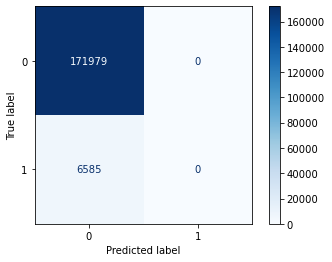

In [12]:
disp = plot_confusion_matrix(clf, X_valid, y_valid,
                             cmap=plt.cm.Blues,
                             normalize=None)

Well, it turns out that our model is completely useless. Let's calculate some basic statistics:

In [13]:
insurance_data.describe()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,0.185304,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,0.388544,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


As you see, there are less than 4% of positive examples, so we have to deal with a highly imbalanced dataset.

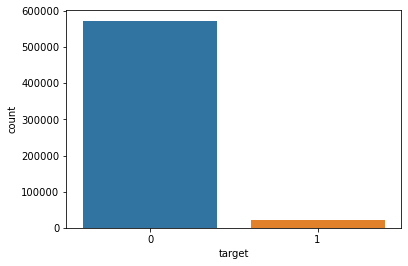

In [14]:
sns.countplot(x='target', data=insurance_data)
plt.show()

Accuracy is not informative here and the Normalized Gini Coefficient will be used instead: https://www.kaggle.com/c/porto-seguro-safe-driver-prediction/overview/evaluation.

In [15]:
# Code for calculating Normalized gini coefficient
# https://www.kaggle.com/c/ClaimPredictionChallenge/discussion/703
def gini(actual, pred, cmpcol = 0, sortcol = 1):  
    assert(len(actual) == len(pred))  
    epsilon = 1e-7
    values = np.asarray(np.c_[actual, pred, np.arange(len(actual))], dtype=np.float)  
    values = values[np.lexsort((values[:, 2], -1 * values[:, 1]))]  
    total = values[:, 0].sum() 
    gini_sum = (values[:, 0].cumsum().sum() + epsilon) / (total + epsilon)  
  
    gini_sum -= (len(actual) + 1) / 2  
    return gini_sum / len(actual)  
  
def gini_normalized(a, p):  
    '''Function to calculate the normalized gini coefficient'''
    return gini(a, p) / gini(a, a)

**(1.5 points)** Prove that the **Normalized Gini Coefficient** is equivalent to **2 x AUC - 1** :

< your proof >
I can copypast acrticle with mathematical prove from https://habr.com/ru/company/ods/blog/350440/ (2. Алгебраическое представление. Доказательство линейной связи с AUC ROC), but i think without clearly understanding it is helpless

**(0.5 points)** By the way, what other metrics could you suggest for this problem?

< your thoughts >
With help AUC. According formula above - we can see corealation about this metrics

Let's calculate the Normalized Gini Coefficient:

In [16]:
y_pred = clf.predict_proba(X_valid)[:, 1]

In [17]:
gini_normalized(y_valid, y_pred)

0.2558723581569817

**(0.5 points + Y bonus points)** Try different approaches: oversampling / undersampling, careful feature analysis and feature engineering, etc., to get a reasonable pipeline and improve the model quality. Use cross-validation for model evaluation.

Select the best model, load the test set and make the predictions. Submit them to kaggle.
Y bonus points will be calculated as $\frac{round(200 * \max(score - 0.253, 0))}{2}$, where *score* is your kaggle leaderboard score.

Note: do not use any classification models which have not been covered in the lessons yet.

In [18]:
## your code
insurance_data = pd.read_csv(os.path.join(PATH, 'porto', 'train.csv'))
insurance_test = pd.read_csv(os.path.join(PATH, 'porto', 'test.csv'))

y = insurance_data['target']
X = insurance_data.drop(columns=['target', 'id'])

X_test_id  = insurance_test['id']
X_test     = insurance_test.drop(columns=['id'])

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 42)



def saveResultToCsv(idData, SurvivedResult, filename='Titanic Predictions.csv'):
    submission = pd.DataFrame({'id':idData,'target':SurvivedResult})
    submission.id = submission.id.astype(int)
    #submission.target = submission.target.astype(float)

    submission.to_csv(filename,index=False)  

#saveResultToCsv(X_test_id, y_test, 'kaggleSubmit3.csv')




In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

parametrs = { 'n_estimators': range (10, 41, 10),
              'max_depth': range (1, 10, 3),
             'criterion' : ['gini', 'entropy'],
              'min_samples_leaf': range (1,9,2),
              'min_samples_split': range (2,10,3) }


clf = RandomForestClassifier()
grid = GridSearchCV(clf, parametrs,  cv=5, verbose=10)
grid.fit(X_train, y_train)
print(grid.best_params_)



Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV 1/5; 1/288] START criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 1/5; 1/288] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   1.8s
[CV 2/5; 1/288] START criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 2/5; 1/288] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   2.0s
[CV 3/5; 1/288] START criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 3/5; 1/288] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   1.7s
[CV 4/5; 1/288] START criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 4/5; 1/288] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   1.8s


[CV 1/5; 8/288] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=5, n_estimators=40; total time=   6.4s
[CV 2/5; 8/288] START criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=5, n_estimators=40
[CV 2/5; 8/288] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=5, n_estimators=40; total time=   6.7s
[CV 3/5; 8/288] START criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=5, n_estimators=40
[CV 3/5; 8/288] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=5, n_estimators=40; total time=   6.2s
[CV 4/5; 8/288] START criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=5, n_estimators=40
[CV 4/5; 8/288] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=5, n_estimators=40; total time=   6.5s
[CV 5/5; 8/288] START criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=5, n_estimators=40
[CV 5/5; 8/288] END criterion=gini, max_depth=1, min_samples_lea

[CV 1/5; 15/288] END criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=30; total time=   6.0s
[CV 2/5; 15/288] START criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=30
[CV 2/5; 15/288] END criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=30; total time=   5.5s
[CV 3/5; 15/288] START criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=30
[CV 3/5; 15/288] END criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=30; total time=   5.0s
[CV 4/5; 15/288] START criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=30
[CV 4/5; 15/288] END criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=30; total time=   4.7s
[CV 5/5; 15/288] START criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=30
[CV 5/5; 15/288] END criterion=gini, max_depth=1, min_sa

[CV 1/5; 22/288] END criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=8, n_estimators=20; total time=   3.3s
[CV 2/5; 22/288] START criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=8, n_estimators=20
[CV 2/5; 22/288] END criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=8, n_estimators=20; total time=   3.2s
[CV 3/5; 22/288] START criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=8, n_estimators=20
[CV 3/5; 22/288] END criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=8, n_estimators=20; total time=   3.6s
[CV 4/5; 22/288] START criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=8, n_estimators=20
[CV 4/5; 22/288] END criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=8, n_estimators=20; total time=   3.3s
[CV 5/5; 22/288] START criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=8, n_estimators=20
[CV 5/5; 22/288] END criterion=gini, max_depth=1, min_sa

[CV 1/5; 29/288] END criterion=gini, max_depth=1, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   1.7s
[CV 2/5; 29/288] START criterion=gini, max_depth=1, min_samples_leaf=5, min_samples_split=5, n_estimators=10
[CV 2/5; 29/288] END criterion=gini, max_depth=1, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   2.0s
[CV 3/5; 29/288] START criterion=gini, max_depth=1, min_samples_leaf=5, min_samples_split=5, n_estimators=10
[CV 3/5; 29/288] END criterion=gini, max_depth=1, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   2.1s
[CV 4/5; 29/288] START criterion=gini, max_depth=1, min_samples_leaf=5, min_samples_split=5, n_estimators=10
[CV 4/5; 29/288] END criterion=gini, max_depth=1, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   2.0s
[CV 5/5; 29/288] START criterion=gini, max_depth=1, min_samples_leaf=5, min_samples_split=5, n_estimators=10
[CV 5/5; 29/288] END criterion=gini, max_depth=1, min_sa

[CV 1/5; 36/288] END criterion=gini, max_depth=1, min_samples_leaf=5, min_samples_split=8, n_estimators=40; total time=   6.7s
[CV 2/5; 36/288] START criterion=gini, max_depth=1, min_samples_leaf=5, min_samples_split=8, n_estimators=40
[CV 2/5; 36/288] END criterion=gini, max_depth=1, min_samples_leaf=5, min_samples_split=8, n_estimators=40; total time=   7.2s
[CV 3/5; 36/288] START criterion=gini, max_depth=1, min_samples_leaf=5, min_samples_split=8, n_estimators=40
[CV 3/5; 36/288] END criterion=gini, max_depth=1, min_samples_leaf=5, min_samples_split=8, n_estimators=40; total time=   6.2s
[CV 4/5; 36/288] START criterion=gini, max_depth=1, min_samples_leaf=5, min_samples_split=8, n_estimators=40
[CV 4/5; 36/288] END criterion=gini, max_depth=1, min_samples_leaf=5, min_samples_split=8, n_estimators=40; total time=   6.5s
[CV 5/5; 36/288] START criterion=gini, max_depth=1, min_samples_leaf=5, min_samples_split=8, n_estimators=40
[CV 5/5; 36/288] END criterion=gini, max_depth=1, min_sa

[CV 1/5; 43/288] END criterion=gini, max_depth=1, min_samples_leaf=7, min_samples_split=5, n_estimators=30; total time=   5.1s
[CV 2/5; 43/288] START criterion=gini, max_depth=1, min_samples_leaf=7, min_samples_split=5, n_estimators=30
[CV 2/5; 43/288] END criterion=gini, max_depth=1, min_samples_leaf=7, min_samples_split=5, n_estimators=30; total time=   4.8s
[CV 3/5; 43/288] START criterion=gini, max_depth=1, min_samples_leaf=7, min_samples_split=5, n_estimators=30
[CV 3/5; 43/288] END criterion=gini, max_depth=1, min_samples_leaf=7, min_samples_split=5, n_estimators=30; total time=   5.0s
[CV 4/5; 43/288] START criterion=gini, max_depth=1, min_samples_leaf=7, min_samples_split=5, n_estimators=30
[CV 4/5; 43/288] END criterion=gini, max_depth=1, min_samples_leaf=7, min_samples_split=5, n_estimators=30; total time=   5.2s
[CV 5/5; 43/288] START criterion=gini, max_depth=1, min_samples_leaf=7, min_samples_split=5, n_estimators=30
[CV 5/5; 43/288] END criterion=gini, max_depth=1, min_sa

[CV 1/5; 50/288] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=  11.7s
[CV 2/5; 50/288] START criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=20
[CV 2/5; 50/288] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=  11.0s
[CV 3/5; 50/288] START criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=20
[CV 3/5; 50/288] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=  10.8s
[CV 4/5; 50/288] START criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=20
[CV 4/5; 50/288] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=  11.2s
[CV 5/5; 50/288] START criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=20
[CV 5/5; 50/288] END criterion=gini, max_depth=4, min_sa

[CV 1/5; 57/288] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=8, n_estimators=10; total time=   6.1s
[CV 2/5; 57/288] START criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=8, n_estimators=10
[CV 2/5; 57/288] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=8, n_estimators=10; total time=   6.1s
[CV 3/5; 57/288] START criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=8, n_estimators=10
[CV 3/5; 57/288] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=8, n_estimators=10; total time=   6.4s
[CV 4/5; 57/288] START criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=8, n_estimators=10
[CV 4/5; 57/288] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=8, n_estimators=10; total time=   6.3s
[CV 5/5; 57/288] START criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=8, n_estimators=10
[CV 5/5; 57/288] END criterion=gini, max_depth=4, min_sa

[CV 1/5; 64/288] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=40; total time=  23.1s
[CV 2/5; 64/288] START criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=40
[CV 2/5; 64/288] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=40; total time=  21.9s
[CV 3/5; 64/288] START criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=40
[CV 3/5; 64/288] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=40; total time=  22.3s
[CV 4/5; 64/288] START criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=40
[CV 4/5; 64/288] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=40; total time=  23.3s
[CV 5/5; 64/288] START criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=40
[CV 5/5; 64/288] END criterion=gini, max_depth=4, min_sa

[CV 1/5; 71/288] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=8, n_estimators=30; total time=  16.6s
[CV 2/5; 71/288] START criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=8, n_estimators=30
[CV 2/5; 71/288] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=8, n_estimators=30; total time=  16.3s
[CV 3/5; 71/288] START criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=8, n_estimators=30
[CV 3/5; 71/288] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=8, n_estimators=30; total time=  16.8s
[CV 4/5; 71/288] START criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=8, n_estimators=30
[CV 4/5; 71/288] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=8, n_estimators=30; total time=  17.3s
[CV 5/5; 71/288] START criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=8, n_estimators=30
[CV 5/5; 71/288] END criterion=gini, max_depth=4, min_sa

[CV 1/5; 78/288] END criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=5, n_estimators=20; total time=  12.4s
[CV 2/5; 78/288] START criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=5, n_estimators=20
[CV 2/5; 78/288] END criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=5, n_estimators=20; total time=  13.3s
[CV 3/5; 78/288] START criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=5, n_estimators=20
[CV 3/5; 78/288] END criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=5, n_estimators=20; total time=  13.1s
[CV 4/5; 78/288] START criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=5, n_estimators=20
[CV 4/5; 78/288] END criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=5, n_estimators=20; total time=  12.1s
[CV 5/5; 78/288] START criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=5, n_estimators=20
[CV 5/5; 78/288] END criterion=gini, max_depth=4, min_sa

[CV 1/5; 85/288] END criterion=gini, max_depth=4, min_samples_leaf=7, min_samples_split=2, n_estimators=10; total time=   6.1s
[CV 2/5; 85/288] START criterion=gini, max_depth=4, min_samples_leaf=7, min_samples_split=2, n_estimators=10
[CV 2/5; 85/288] END criterion=gini, max_depth=4, min_samples_leaf=7, min_samples_split=2, n_estimators=10; total time=   7.8s
[CV 3/5; 85/288] START criterion=gini, max_depth=4, min_samples_leaf=7, min_samples_split=2, n_estimators=10
[CV 3/5; 85/288] END criterion=gini, max_depth=4, min_samples_leaf=7, min_samples_split=2, n_estimators=10; total time=   6.3s
[CV 4/5; 85/288] START criterion=gini, max_depth=4, min_samples_leaf=7, min_samples_split=2, n_estimators=10
[CV 4/5; 85/288] END criterion=gini, max_depth=4, min_samples_leaf=7, min_samples_split=2, n_estimators=10; total time=   6.4s
[CV 5/5; 85/288] START criterion=gini, max_depth=4, min_samples_leaf=7, min_samples_split=2, n_estimators=10
[CV 5/5; 85/288] END criterion=gini, max_depth=4, min_sa

[CV 1/5; 92/288] END criterion=gini, max_depth=4, min_samples_leaf=7, min_samples_split=5, n_estimators=40; total time=  22.4s
[CV 2/5; 92/288] START criterion=gini, max_depth=4, min_samples_leaf=7, min_samples_split=5, n_estimators=40
[CV 2/5; 92/288] END criterion=gini, max_depth=4, min_samples_leaf=7, min_samples_split=5, n_estimators=40; total time=  22.7s
[CV 3/5; 92/288] START criterion=gini, max_depth=4, min_samples_leaf=7, min_samples_split=5, n_estimators=40
[CV 3/5; 92/288] END criterion=gini, max_depth=4, min_samples_leaf=7, min_samples_split=5, n_estimators=40; total time=  22.6s
[CV 4/5; 92/288] START criterion=gini, max_depth=4, min_samples_leaf=7, min_samples_split=5, n_estimators=40
[CV 4/5; 92/288] END criterion=gini, max_depth=4, min_samples_leaf=7, min_samples_split=5, n_estimators=40; total time=  22.1s
[CV 5/5; 92/288] START criterion=gini, max_depth=4, min_samples_leaf=7, min_samples_split=5, n_estimators=40
[CV 5/5; 92/288] END criterion=gini, max_depth=4, min_sa

[CV 1/5; 99/288] END criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=  34.7s
[CV 2/5; 99/288] START criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=30
[CV 2/5; 99/288] END criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=  32.4s
[CV 3/5; 99/288] START criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=30
[CV 3/5; 99/288] END criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=  27.6s
[CV 4/5; 99/288] START criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=30
[CV 4/5; 99/288] END criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=  28.4s
[CV 5/5; 99/288] START criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=30
[CV 5/5; 99/288] END criterion=gini, max_depth=7, min_sa

[CV 1/5; 106/288] END criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=8, n_estimators=20; total time=  33.1s
[CV 2/5; 106/288] START criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=8, n_estimators=20
[CV 2/5; 106/288] END criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=8, n_estimators=20; total time=  28.7s
[CV 3/5; 106/288] START criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=8, n_estimators=20
[CV 3/5; 106/288] END criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=8, n_estimators=20; total time=  25.2s
[CV 4/5; 106/288] START criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=8, n_estimators=20
[CV 4/5; 106/288] END criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=8, n_estimators=20; total time=  26.2s
[CV 5/5; 106/288] START criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=8, n_estimators=20
[CV 5/5; 106/288] END criterion=gini, max_depth=

[CV 1/5; 113/288] END criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=10; total time=   9.2s
[CV 2/5; 113/288] START criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=10
[CV 2/5; 113/288] END criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=10; total time=   9.2s
[CV 3/5; 113/288] START criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=10
[CV 3/5; 113/288] END criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=10; total time=   9.2s
[CV 4/5; 113/288] START criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=10
[CV 4/5; 113/288] END criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=10; total time=   9.3s
[CV 5/5; 113/288] START criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=10
[CV 5/5; 113/288] END criterion=gini, max_depth=

[CV 1/5; 120/288] END criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=8, n_estimators=40; total time=  37.0s
[CV 2/5; 120/288] START criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=8, n_estimators=40
[CV 2/5; 120/288] END criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=8, n_estimators=40; total time=  36.5s
[CV 3/5; 120/288] START criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=8, n_estimators=40
[CV 3/5; 120/288] END criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=8, n_estimators=40; total time=  35.8s
[CV 4/5; 120/288] START criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=8, n_estimators=40
[CV 4/5; 120/288] END criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=8, n_estimators=40; total time=  35.5s
[CV 5/5; 120/288] START criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=8, n_estimators=40
[CV 5/5; 120/288] END criterion=gini, max_depth=

[CV 1/5; 127/288] END criterion=gini, max_depth=7, min_samples_leaf=5, min_samples_split=5, n_estimators=30; total time=  29.0s
[CV 2/5; 127/288] START criterion=gini, max_depth=7, min_samples_leaf=5, min_samples_split=5, n_estimators=30
[CV 2/5; 127/288] END criterion=gini, max_depth=7, min_samples_leaf=5, min_samples_split=5, n_estimators=30; total time=  28.1s
[CV 3/5; 127/288] START criterion=gini, max_depth=7, min_samples_leaf=5, min_samples_split=5, n_estimators=30
[CV 3/5; 127/288] END criterion=gini, max_depth=7, min_samples_leaf=5, min_samples_split=5, n_estimators=30; total time=  29.0s
[CV 4/5; 127/288] START criterion=gini, max_depth=7, min_samples_leaf=5, min_samples_split=5, n_estimators=30
[CV 4/5; 127/288] END criterion=gini, max_depth=7, min_samples_leaf=5, min_samples_split=5, n_estimators=30; total time=  27.3s
[CV 5/5; 127/288] START criterion=gini, max_depth=7, min_samples_leaf=5, min_samples_split=5, n_estimators=30
[CV 5/5; 127/288] END criterion=gini, max_depth=

[CV 1/5; 134/288] END criterion=gini, max_depth=7, min_samples_leaf=7, min_samples_split=2, n_estimators=20; total time=  18.6s
[CV 2/5; 134/288] START criterion=gini, max_depth=7, min_samples_leaf=7, min_samples_split=2, n_estimators=20
[CV 2/5; 134/288] END criterion=gini, max_depth=7, min_samples_leaf=7, min_samples_split=2, n_estimators=20; total time=  17.7s
[CV 3/5; 134/288] START criterion=gini, max_depth=7, min_samples_leaf=7, min_samples_split=2, n_estimators=20
[CV 3/5; 134/288] END criterion=gini, max_depth=7, min_samples_leaf=7, min_samples_split=2, n_estimators=20; total time=  18.3s
[CV 4/5; 134/288] START criterion=gini, max_depth=7, min_samples_leaf=7, min_samples_split=2, n_estimators=20
[CV 4/5; 134/288] END criterion=gini, max_depth=7, min_samples_leaf=7, min_samples_split=2, n_estimators=20; total time=  18.3s
[CV 5/5; 134/288] START criterion=gini, max_depth=7, min_samples_leaf=7, min_samples_split=2, n_estimators=20
[CV 5/5; 134/288] END criterion=gini, max_depth=

[CV 1/5; 141/288] END criterion=gini, max_depth=7, min_samples_leaf=7, min_samples_split=8, n_estimators=10; total time=   9.2s
[CV 2/5; 141/288] START criterion=gini, max_depth=7, min_samples_leaf=7, min_samples_split=8, n_estimators=10
[CV 2/5; 141/288] END criterion=gini, max_depth=7, min_samples_leaf=7, min_samples_split=8, n_estimators=10; total time=   8.6s
[CV 3/5; 141/288] START criterion=gini, max_depth=7, min_samples_leaf=7, min_samples_split=8, n_estimators=10
[CV 3/5; 141/288] END criterion=gini, max_depth=7, min_samples_leaf=7, min_samples_split=8, n_estimators=10; total time=   9.0s
[CV 4/5; 141/288] START criterion=gini, max_depth=7, min_samples_leaf=7, min_samples_split=8, n_estimators=10
[CV 4/5; 141/288] END criterion=gini, max_depth=7, min_samples_leaf=7, min_samples_split=8, n_estimators=10; total time=   8.9s
[CV 5/5; 141/288] START criterion=gini, max_depth=7, min_samples_leaf=7, min_samples_split=8, n_estimators=10
[CV 5/5; 141/288] END criterion=gini, max_depth=

[CV 1/5; 148/288] END criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   6.3s
[CV 2/5; 148/288] START criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=40
[CV 2/5; 148/288] END criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   6.6s
[CV 3/5; 148/288] START criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=40
[CV 3/5; 148/288] END criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   6.0s
[CV 4/5; 148/288] START criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=40
[CV 4/5; 148/288] END criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   7.1s
[CV 5/5; 148/288] START criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=40
[CV 5/5; 148/288] END cr

[CV 5/5; 154/288] END criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=8, n_estimators=20; total time=   3.3s
[CV 1/5; 155/288] START criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=8, n_estimators=30
[CV 1/5; 155/288] END criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=8, n_estimators=30; total time=   4.6s
[CV 2/5; 155/288] START criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=8, n_estimators=30
[CV 2/5; 155/288] END criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=8, n_estimators=30; total time=   5.0s
[CV 3/5; 155/288] START criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=8, n_estimators=30
[CV 3/5; 155/288] END criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=8, n_estimators=30; total time=   4.9s
[CV 4/5; 155/288] START criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=8, n_estimators=30
[CV 4/5; 155/288] END cr

[CV 4/5; 161/288] END criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=5, n_estimators=10; total time=   1.9s
[CV 5/5; 161/288] START criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=5, n_estimators=10
[CV 5/5; 161/288] END criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=5, n_estimators=10; total time=   2.0s
[CV 1/5; 162/288] START criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=5, n_estimators=20
[CV 1/5; 162/288] END criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=5, n_estimators=20; total time=   3.3s
[CV 2/5; 162/288] START criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=5, n_estimators=20
[CV 2/5; 162/288] END criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=5, n_estimators=20; total time=   3.4s
[CV 3/5; 162/288] START criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=5, n_estimators=20
[CV 3/5; 162/288] END cr

[CV 3/5; 168/288] END criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=8, n_estimators=40; total time=   6.4s
[CV 4/5; 168/288] START criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=8, n_estimators=40
[CV 4/5; 168/288] END criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=8, n_estimators=40; total time=   7.1s
[CV 5/5; 168/288] START criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=8, n_estimators=40
[CV 5/5; 168/288] END criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=8, n_estimators=40; total time=   6.4s
[CV 1/5; 169/288] START criterion=entropy, max_depth=1, min_samples_leaf=5, min_samples_split=2, n_estimators=10
[CV 1/5; 169/288] END criterion=entropy, max_depth=1, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   1.8s
[CV 2/5; 169/288] START criterion=entropy, max_depth=1, min_samples_leaf=5, min_samples_split=2, n_estimators=10
[CV 2/5; 169/288] END cr

[CV 2/5; 175/288] END criterion=entropy, max_depth=1, min_samples_leaf=5, min_samples_split=5, n_estimators=30; total time=   6.2s
[CV 3/5; 175/288] START criterion=entropy, max_depth=1, min_samples_leaf=5, min_samples_split=5, n_estimators=30
[CV 3/5; 175/288] END criterion=entropy, max_depth=1, min_samples_leaf=5, min_samples_split=5, n_estimators=30; total time=   5.0s
[CV 4/5; 175/288] START criterion=entropy, max_depth=1, min_samples_leaf=5, min_samples_split=5, n_estimators=30
[CV 4/5; 175/288] END criterion=entropy, max_depth=1, min_samples_leaf=5, min_samples_split=5, n_estimators=30; total time=   5.8s
[CV 5/5; 175/288] START criterion=entropy, max_depth=1, min_samples_leaf=5, min_samples_split=5, n_estimators=30
[CV 5/5; 175/288] END criterion=entropy, max_depth=1, min_samples_leaf=5, min_samples_split=5, n_estimators=30; total time=   5.8s
[CV 1/5; 176/288] START criterion=entropy, max_depth=1, min_samples_leaf=5, min_samples_split=5, n_estimators=40
[CV 1/5; 176/288] END cr

[CV 1/5; 182/288] END criterion=entropy, max_depth=1, min_samples_leaf=7, min_samples_split=2, n_estimators=20; total time=   3.9s
[CV 2/5; 182/288] START criterion=entropy, max_depth=1, min_samples_leaf=7, min_samples_split=2, n_estimators=20
[CV 2/5; 182/288] END criterion=entropy, max_depth=1, min_samples_leaf=7, min_samples_split=2, n_estimators=20; total time=   3.9s
[CV 3/5; 182/288] START criterion=entropy, max_depth=1, min_samples_leaf=7, min_samples_split=2, n_estimators=20
[CV 3/5; 182/288] END criterion=entropy, max_depth=1, min_samples_leaf=7, min_samples_split=2, n_estimators=20; total time=   3.7s
[CV 4/5; 182/288] START criterion=entropy, max_depth=1, min_samples_leaf=7, min_samples_split=2, n_estimators=20
[CV 4/5; 182/288] END criterion=entropy, max_depth=1, min_samples_leaf=7, min_samples_split=2, n_estimators=20; total time=   3.9s
[CV 5/5; 182/288] START criterion=entropy, max_depth=1, min_samples_leaf=7, min_samples_split=2, n_estimators=20
[CV 5/5; 182/288] END cr

[CV 5/5; 188/288] END criterion=entropy, max_depth=1, min_samples_leaf=7, min_samples_split=5, n_estimators=40; total time=   7.8s
[CV 1/5; 189/288] START criterion=entropy, max_depth=1, min_samples_leaf=7, min_samples_split=8, n_estimators=10
[CV 1/5; 189/288] END criterion=entropy, max_depth=1, min_samples_leaf=7, min_samples_split=8, n_estimators=10; total time=   2.1s
[CV 2/5; 189/288] START criterion=entropy, max_depth=1, min_samples_leaf=7, min_samples_split=8, n_estimators=10
[CV 2/5; 189/288] END criterion=entropy, max_depth=1, min_samples_leaf=7, min_samples_split=8, n_estimators=10; total time=   1.8s
[CV 3/5; 189/288] START criterion=entropy, max_depth=1, min_samples_leaf=7, min_samples_split=8, n_estimators=10
[CV 3/5; 189/288] END criterion=entropy, max_depth=1, min_samples_leaf=7, min_samples_split=8, n_estimators=10; total time=   2.2s
[CV 4/5; 189/288] START criterion=entropy, max_depth=1, min_samples_leaf=7, min_samples_split=8, n_estimators=10
[CV 4/5; 189/288] END cr

[CV 4/5; 195/288] END criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=  17.2s
[CV 5/5; 195/288] START criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=30
[CV 5/5; 195/288] END criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=  18.0s
[CV 1/5; 196/288] START criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=40
[CV 1/5; 196/288] END criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=  22.8s
[CV 2/5; 196/288] START criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=40
[CV 2/5; 196/288] END criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=  21.7s
[CV 3/5; 196/288] START criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=40
[CV 3/5; 196/288] END cr

[CV 3/5; 202/288] END criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=8, n_estimators=20; total time=  10.6s
[CV 4/5; 202/288] START criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=8, n_estimators=20
[CV 4/5; 202/288] END criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=8, n_estimators=20; total time=  10.6s
[CV 5/5; 202/288] START criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=8, n_estimators=20
[CV 5/5; 202/288] END criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=8, n_estimators=20; total time=  11.0s
[CV 1/5; 203/288] START criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=8, n_estimators=30
[CV 1/5; 203/288] END criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=8, n_estimators=30; total time=  16.4s
[CV 2/5; 203/288] START criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=8, n_estimators=30
[CV 2/5; 203/288] END cr

[CV 2/5; 209/288] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=10; total time=   5.5s
[CV 3/5; 209/288] START criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=10
[CV 3/5; 209/288] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=10; total time=   5.5s
[CV 4/5; 209/288] START criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=10
[CV 4/5; 209/288] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=10; total time=   5.7s
[CV 5/5; 209/288] START criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=10
[CV 5/5; 209/288] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=10; total time=   5.6s
[CV 1/5; 210/288] START criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=20
[CV 1/5; 210/288] END cr

[CV 1/5; 216/288] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=8, n_estimators=40; total time=  21.8s
[CV 2/5; 216/288] START criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=8, n_estimators=40
[CV 2/5; 216/288] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=8, n_estimators=40; total time=  22.0s
[CV 3/5; 216/288] START criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=8, n_estimators=40
[CV 3/5; 216/288] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=8, n_estimators=40; total time=  22.1s
[CV 4/5; 216/288] START criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=8, n_estimators=40
[CV 4/5; 216/288] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=8, n_estimators=40; total time=  22.3s
[CV 5/5; 216/288] START criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=8, n_estimators=40
[CV 5/5; 216/288] END cr

[CV 5/5; 222/288] END criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=5, n_estimators=20; total time=  11.1s
[CV 1/5; 223/288] START criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=5, n_estimators=30
[CV 1/5; 223/288] END criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=5, n_estimators=30; total time=  16.5s
[CV 2/5; 223/288] START criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=5, n_estimators=30
[CV 2/5; 223/288] END criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=5, n_estimators=30; total time=  16.4s
[CV 3/5; 223/288] START criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=5, n_estimators=30
[CV 3/5; 223/288] END criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=5, n_estimators=30; total time=  16.6s
[CV 4/5; 223/288] START criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=5, n_estimators=30
[CV 4/5; 223/288] END cr

[CV 4/5; 229/288] END criterion=entropy, max_depth=4, min_samples_leaf=7, min_samples_split=2, n_estimators=10; total time=   6.4s
[CV 5/5; 229/288] START criterion=entropy, max_depth=4, min_samples_leaf=7, min_samples_split=2, n_estimators=10
[CV 5/5; 229/288] END criterion=entropy, max_depth=4, min_samples_leaf=7, min_samples_split=2, n_estimators=10; total time=   5.5s
[CV 1/5; 230/288] START criterion=entropy, max_depth=4, min_samples_leaf=7, min_samples_split=2, n_estimators=20
[CV 1/5; 230/288] END criterion=entropy, max_depth=4, min_samples_leaf=7, min_samples_split=2, n_estimators=20; total time=  11.3s
[CV 2/5; 230/288] START criterion=entropy, max_depth=4, min_samples_leaf=7, min_samples_split=2, n_estimators=20
[CV 2/5; 230/288] END criterion=entropy, max_depth=4, min_samples_leaf=7, min_samples_split=2, n_estimators=20; total time=  11.7s
[CV 3/5; 230/288] START criterion=entropy, max_depth=4, min_samples_leaf=7, min_samples_split=2, n_estimators=20
[CV 3/5; 230/288] END cr

[CV 3/5; 236/288] END criterion=entropy, max_depth=4, min_samples_leaf=7, min_samples_split=5, n_estimators=40; total time=  21.6s
[CV 4/5; 236/288] START criterion=entropy, max_depth=4, min_samples_leaf=7, min_samples_split=5, n_estimators=40
[CV 4/5; 236/288] END criterion=entropy, max_depth=4, min_samples_leaf=7, min_samples_split=5, n_estimators=40; total time=  22.7s
[CV 5/5; 236/288] START criterion=entropy, max_depth=4, min_samples_leaf=7, min_samples_split=5, n_estimators=40


In [46]:
criterion_val           = 'entropy'
max_depth_val           = 7 
min_samples_split_val   = 6
min_samples_leaf_val    = 4
n_estimators_val        = 30

model_rf = RandomForestClassifier(  n_estimators=n_estimators_val, 
                                     criterion=criterion_val,
                                     max_depth = max_depth_val,
                                     min_samples_split = min_samples_split_val,
                                     min_samples_leaf = min_samples_leaf_val)

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', model_rf)])

clf = pipeline.fit(X_train, y_train)
y_test = clf.predict_proba(X_test)[:,1]


saveResultToCsv(X_test_id, y_test, 'Safe_Driver.csv')

y_valid_pred = pipeline.predict(X_valid) 
print('Accuracy on valid test: {}'.format(accuracy_score(y_valid, y_valid_pred)))

### The best score on kaggle: 0.25179
### login k0sm0s
### according formula points = 0,5+-0,121 = 0,379 ~= 0,4

KeyboardInterrupt: 